## Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [6]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


# Check Shape

In [7]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1025, 14)


In [8]:
print("\n" + "="*50)
print("TASK 1: DATA CLEANING")
print("="*50)


TASK 1: DATA CLEANING


# Check missing values

In [9]:
print(df.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


# Check Datatype

In [10]:
print("\nData Types:")
print(df.dtypes)


Data Types:
age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object


# Check Duplicates

In [11]:
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 723


# Drop Duplicates

In [12]:
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (302, 14)


# Data Preprocessing

In [13]:
print("\nUnique values in each column:")
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col}: {len(unique_vals)} unique values")
    if len(unique_vals) < 15:
        print(f"   {unique_vals}")


Unique values in each column:
age: 41 unique values
sex: 2 unique values
   ['Male' 'Female']
chest_pain_type: 4 unique values
   ['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']
resting_blood_pressure: 49 unique values
cholestoral: 152 unique values
fasting_blood_sugar: 2 unique values
   ['Lower than 120 mg/ml' 'Greater than 120 mg/ml']
rest_ecg: 3 unique values
   ['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']
Max_heart_rate: 91 unique values
exercise_induced_angina: 2 unique values
   ['No' 'Yes']
oldpeak: 40 unique values
slope: 3 unique values
   ['Downsloping' 'Upsloping' 'Flat']
vessels_colored_by_flourosopy: 5 unique values
   ['Two' 'Zero' 'One' 'Three' 'Four']
thalassemia: 4 unique values
   ['Reversable Defect' 'Fixed Defect' 'Normal' 'No']
target: 2 unique values
   [0 1]


In [14]:
print(f"\nThalassemia 'No' count: {(df['thalassemia'] == 'No').sum()}")


Thalassemia 'No' count: 2


In [15]:
label_encoders = {}
categorical_columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                      'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 
                      'thalassemia']
categorical_columns 

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia']

In [16]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"\n{col} encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")
df


sex encoding: {'Female': np.int64(0), 'Male': np.int64(1)}

chest_pain_type encoding: {'Asymptomatic': np.int64(0), 'Atypical angina': np.int64(1), 'Non-anginal pain': np.int64(2), 'Typical angina': np.int64(3)}

fasting_blood_sugar encoding: {'Greater than 120 mg/ml': np.int64(0), 'Lower than 120 mg/ml': np.int64(1)}

rest_ecg encoding: {'Left ventricular hypertrophy': np.int64(0), 'Normal': np.int64(1), 'ST-T wave abnormality': np.int64(2)}

exercise_induced_angina encoding: {'No': np.int64(0), 'Yes': np.int64(1)}

slope encoding: {'Downsloping': np.int64(0), 'Flat': np.int64(1), 'Upsloping': np.int64(2)}

vessels_colored_by_flourosopy encoding: {'Four': np.int64(0), 'One': np.int64(1), 'Three': np.int64(2), 'Two': np.int64(3), 'Zero': np.int64(4)}

thalassemia encoding: {'Fixed Defect': np.int64(0), 'No': np.int64(1), 'Normal': np.int64(2), 'Reversable Defect': np.int64(3)}


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,1,1,115,0,1.5,1,4,0,1
733,44,0,2,108,141,1,2,175,0,0.6,1,4,0,1
739,52,1,3,128,255,1,2,161,1,0.0,0,1,3,0
843,59,1,0,160,273,1,1,125,0,0.0,0,4,0,0


In [17]:
print("\n" + "="*50)
print("TASK 2: EXPLORATORY DATA ANALYSIS")
print("="*50)



TASK 2: EXPLORATORY DATA ANALYSIS


# Summary Statistic

In [18]:
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,2.155629,131.602649,246.500000,0.850993,1.486755,149.569536,0.327815,1.043046,0.602649,3.043046,1.288079,0.543046
std,9.04797,0.466426,0.960491,17.563394,51.753489,0.356686,0.526529,22.903527,0.470196,1.161452,0.616274,1.276468,1.442056,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,2.000000,120.000000,211.000000,1.000000,1.000000,133.250000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,55.50000,1.000000,2.000000,130.000000,240.500000,1.000000,1.500000,152.500000,0.000000,0.800000,1.000000,4.000000,0.000000,1.000000
75%,61.00000,1.000000,3.000000,140.000000,274.750000,1.000000,2.000000,166.000000,1.000000,1.600000,1.000000,4.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Subplot

Text(0, 0.5, 'Count')

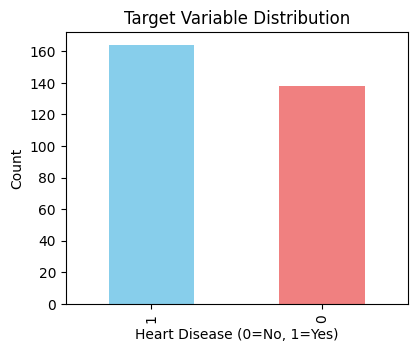

In [19]:
plt.figure(figsize=(15, 12))
plt.subplot(3, 3, 1)
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Target Variable Distribution')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')

# Histogram

Text(0.5, 1.0, 'Age Distribution by Heart Disease')

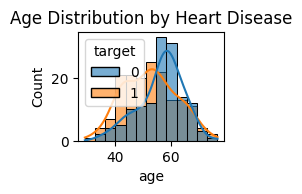

In [20]:
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='age', hue='target', kde=True, alpha=0.6)
plt.title('Age Distribution by Heart Disease')

# Subplot

Text(0, 0.5, 'Count')

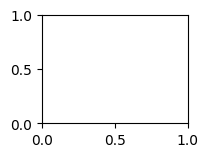

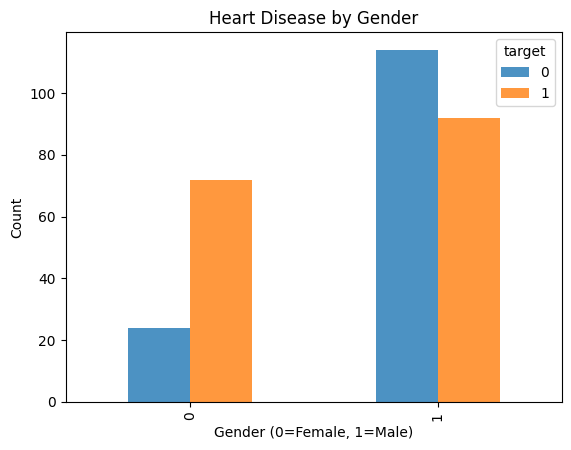

In [21]:
plt.subplot(3, 3, 3)
pd.crosstab(df['sex'], df['target']).plot(kind='bar', alpha=0.8)
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Count')

# Subplot

Text(0, 0.5, 'Count')

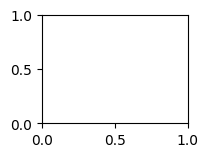

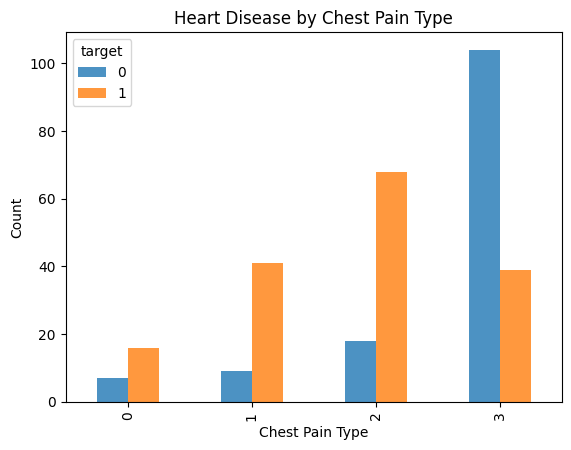

In [22]:
plt.subplot(3, 3, 4)
pd.crosstab(df['chest_pain_type'], df['target']).plot(kind='bar', alpha=0.8)
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# Boxplot

Text(0.5, 1.0, 'Resting Blood Pressure by Heart Disease')

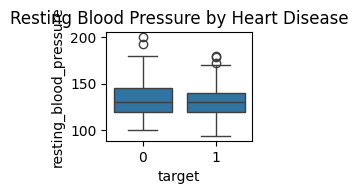

In [23]:
plt.subplot(3, 3, 5)
sns.boxplot(data=df, x='target',y="resting_blood_pressure")
plt.title('Resting Blood Pressure by Heart Disease')

# Boxplot

Text(0.5, 1.0, 'Cholesterol by Heart Disease')

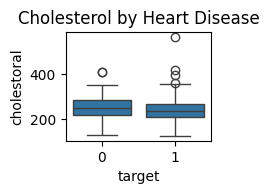

In [24]:
plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='target', y='cholestoral')
plt.title('Cholesterol by Heart Disease')

# Boxplot

Text(0.5, 1.0, 'Max Heart Rate by Heart Disease')

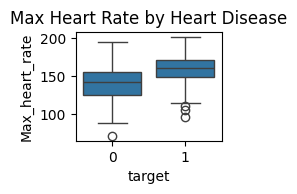

In [25]:
# Max heart rate by target
plt.subplot(3, 3, 7)
sns.boxplot(data=df, x='target', y='Max_heart_rate')
plt.title('Max Heart Rate by Heart Disease')


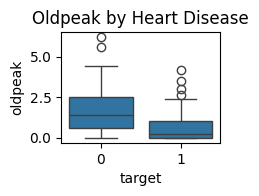

In [26]:
plt.subplot(3, 3, 8)
sns.boxplot(data=df, x='target', y='oldpeak')
plt.title('Oldpeak by Heart Disease')
plt.tight_layout()
plt.show()

In [27]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
age,1.000000,-0.094962,0.102543,0.283121,0.207216,-0.119492,-0.166543,-0.395235,0.093216,0.206040,0.164124,-0.262476,0.127927,-0.221476
sex,-0.094962,1.000000,0.014390,-0.057647,-0.195571,-0.046022,0.009855,-0.046439,0.143460,0.098322,0.032990,-0.144343,0.373689,-0.283609
chest_pain_type,0.102543,0.014390,1.000000,-0.040633,0.069274,0.038822,-0.084596,-0.336440,0.386889,0.205420,0.155332,-0.159938,0.267349,-0.412621
resting_blood_pressure,0.283121,-0.057647,-0.040633,1.000000,0.125256,-0.178125,-0.153614,-0.048023,0.068526,0.194600,0.122873,-0.001457,0.136625,-0.146269
cholestoral,0.207216,-0.195571,0.069274,0.125256,1.000000,-0.011428,-0.169772,-0.005308,0.064099,0.050086,-0.000417,-0.044884,0.022592,-0.081437
fasting_blood_sugar,-0.119492,-0.046022,0.038822,-0.178125,-0.011428,1.000000,0.051371,0.007169,-0.024729,-0.004514,-0.058654,0.057916,-0.064825,0.026826
rest_ecg,-0.166543,0.009855,-0.084596,-0.153614,-0.169772,0.051371,1.000000,0.119916,-0.096468,-0.165846,-0.169851,0.087356,-0.023399,0.179215
Max_heart_rate,-0.395235,-0.046439,-0.336440,-0.048023,-0.005308,0.007169,0.119916,1.000000,-0.377411,-0.342201,-0.384754,0.256661,-0.271745,0.419955
exercise_induced_angina,0.093216,0.143460,0.386889,0.068526,0.064099,-0.024729,-0.096468,-0.377411,1.000000,0.286766,0.256106,-0.167508,0.325735,-0.435601
oldpeak,0.206040,0.098322,0.205420,0.194600,0.050086,-0.004514,-0.165846,-0.342201,0.286766,1.000000,0.576314,-0.084615,0.337120,-0.429146


In [28]:
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
target_correlations 

target                           1.000000
Max_heart_rate                   0.419955
vessels_colored_by_flourosopy    0.359602
rest_ecg                         0.179215
fasting_blood_sugar              0.026826
cholestoral                     -0.081437
resting_blood_pressure          -0.146269
age                             -0.221476
sex                             -0.283609
slope                           -0.343940
chest_pain_type                 -0.412621
oldpeak                         -0.429146
exercise_induced_angina         -0.435601
thalassemia                     -0.527490
Name: target, dtype: float64

# Sorting

In [29]:
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("\nTop correlations with target variable:")
target_correlations


Top correlations with target variable:


target                           1.000000
Max_heart_rate                   0.419955
vessels_colored_by_flourosopy    0.359602
rest_ecg                         0.179215
fasting_blood_sugar              0.026826
cholestoral                     -0.081437
resting_blood_pressure          -0.146269
age                             -0.221476
sex                             -0.283609
slope                           -0.343940
chest_pain_type                 -0.412621
oldpeak                         -0.429146
exercise_induced_angina         -0.435601
thalassemia                     -0.527490
Name: target, dtype: float64

In [30]:
print("\n" + "="*50)
print("TASK 3: MODEL TRAINING")
print("="*50)


TASK 3: MODEL TRAINING


# Drop Column

In [31]:
X = df.drop('target', axis=1)
y = df['target']
X


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,1,1,115,0,1.5,1,4,0
733,44,0,2,108,141,1,2,175,0,0.6,1,4,0
739,52,1,3,128,255,1,2,161,1,0.0,0,1,3
843,59,1,0,160,273,1,1,125,0,0.0,0,4,0


# Spliting Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test

(     age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
 158   67    0                2                     115          564   
 199   50    1                3                     144          200   
 479   58    1                3                     128          216   
 460   69    1                2                     140          254   
 169   45    0                1                     112          160   
 ..   ...  ...              ...                     ...          ...   
 100   43    0                2                     122          213   
 320   53    0                3                     130          264   
 472   58    0                3                     130          197   
 733   44    0                2                     108          141   
 549   68    1                2                     118          277   
 
      fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
 158                    1         1             160   

# Train Model

In [33]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (241, 13)
Test set size: (61, 13)


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler

,copy,True
,with_mean,True
,with_std,True


In [35]:
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


--- Logistic Regression ---


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
print("\n--- Decision Tree ---")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)


--- Decision Tree ---


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
print("\n" + "="*50)
print("TASK 4: MODEL EVALUATION")
print("="*50)


TASK 4: MODEL EVALUATION


# Prediction

In [38]:
def evaluate_model(model, X_test, y_test, model_name, scaled=True):
    if scaled:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {auc_score:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return y_pred, y_pred_proba, accuracy, auc_score

In [39]:
lr_pred, lr_pred_proba, lr_accuracy, lr_auc = evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression")
dt_pred, dt_pred_proba, dt_accuracy, dt_auc = evaluate_model(dt_model, X_test, y_test, "Decision Tree", scaled=False)
lr_pred, lr_pred_proba, lr_accuracy, lr_auc
dt_pred, dt_pred_proba, dt_accuracy, dt_auc


Logistic Regression Results:
Accuracy: 0.8033
ROC-AUC Score: 0.8788

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Decision Tree Results:
Accuracy: 0.8033
ROC-AUC Score: 0.8106

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



(array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]),
 array([0.        , 0.        , 0.        , 0.76470588, 0.94736842,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.64285714, 0.76470588, 1.        , 1.        , 0.        ,
        1.        , 0.76470588, 1.        , 1.        , 0.94736842,
        0.        , 0.        , 0.94736842, 0.        , 0.76470588,
        0.        , 0.        , 0.        , 1.        , 0.94736842,
        0.        , 0.        , 0.        , 0.76470588, 0.        ,
        1.        , 0.        , 0.76470588, 1.        , 1.        ,
        0.        , 0.94736842, 0.94736842, 0.76470588, 0.4       ,
        0.4       , 0.        , 0.4       , 1.        , 0.        ,
        0.71428571, 1.        , 1.        , 0.        , 0.76470588,
        0.94736842, 0.        , 1.        ,

# Heatmap

Text(158.22222222222223, 0.5, 'Actual')

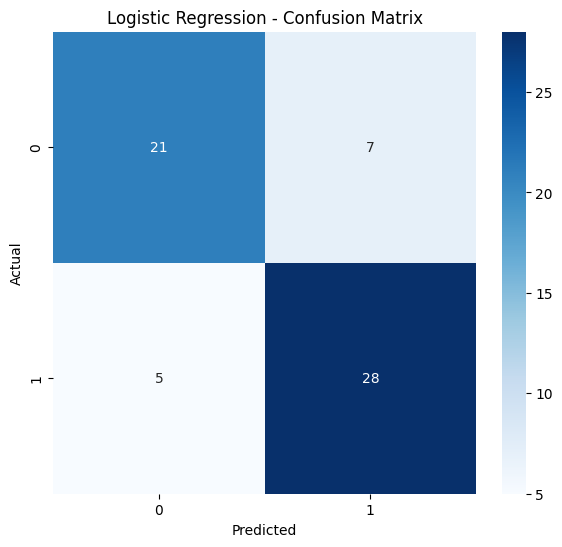

In [40]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


# Heatmap

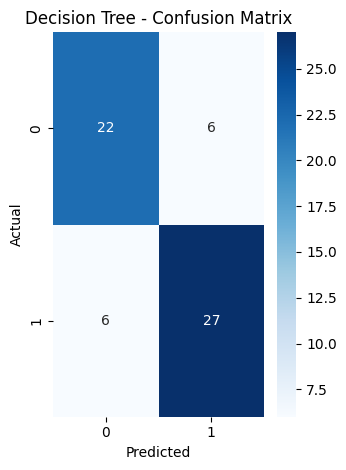

In [41]:
plt.subplot(1, 2, 2)
cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot

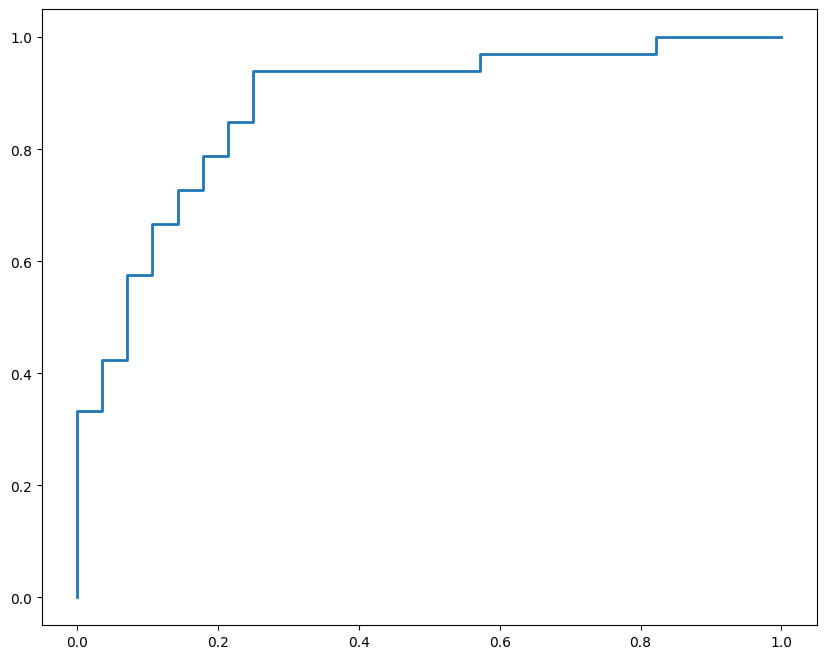

In [42]:
plt.figure(figsize=(10, 8))
# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.4f})', linewidth=2)

# Plot

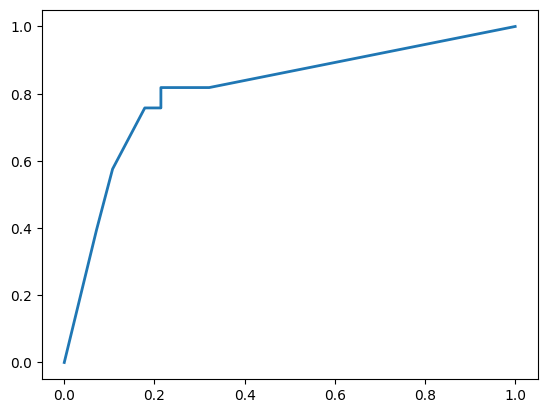

In [43]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred_proba)
fpr_dt, tpr_dt, _
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_auc:.4f})', linewidth=2)

# Plot

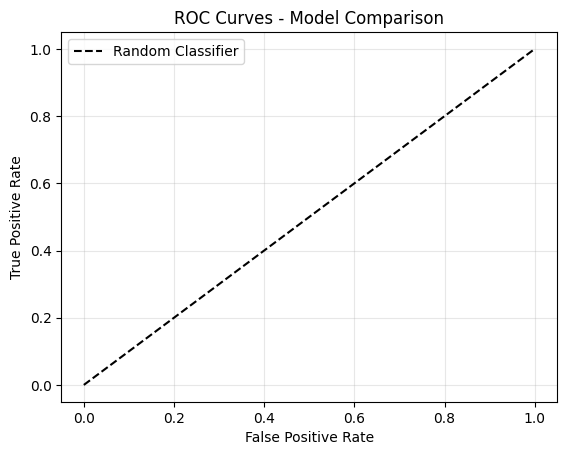

In [44]:
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [45]:
print("\n" + "="*50)
print("TASK 5: FEATURE IMPORTANCE ANALYSIS")
print("="*50)


TASK 5: FEATURE IMPORTANCE ANALYSIS


# Sorting

In [46]:
lr_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(lr_model.coef_[0])
}).sort_values('importance', ascending=False)
lr_importance


,feature,importance
2,chest_pain_type,0.735747
1,sex,0.689412
7,Max_heart_rate,0.671800
12,thalassemia,0.617160
11,vessels_colored_by_flourosopy,0.606421
8,exercise_induced_angina,0.489789
3,resting_blood_pressure,0.335278
9,oldpeak,0.330101
6,rest_ecg,0.253015
4,cholestoral,0.252241


# Sorting

In [47]:
dt_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nDecision Tree - Feature Importance:")
dt_importance


Decision Tree - Feature Importance:


,feature,importance
2,chest_pain_type,0.393877
12,thalassemia,0.147268
11,vessels_colored_by_flourosopy,0.112422
9,oldpeak,0.101962
3,resting_blood_pressure,0.058898
4,cholestoral,0.057191
7,Max_heart_rate,0.050861
1,sex,0.043178
6,rest_ecg,0.029629
10,slope,0.004714


# Barplot

Text(0.5, 0, 'Absolute Coefficient Value')

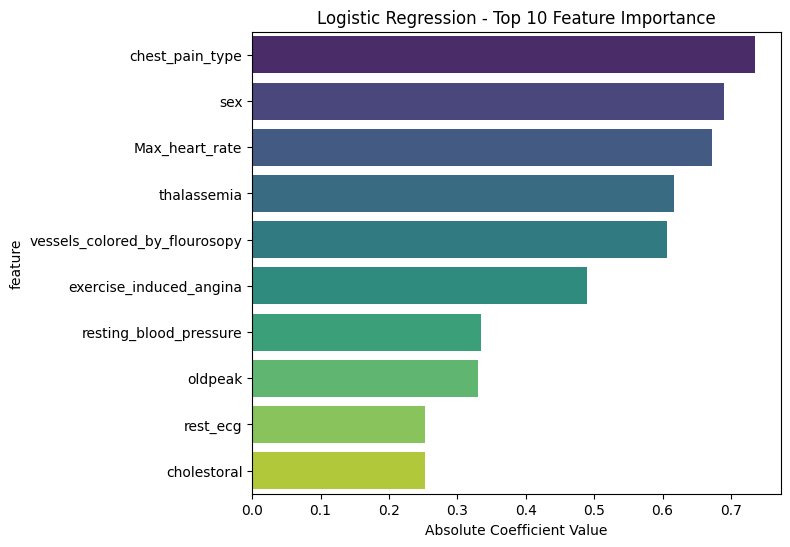

In [48]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=lr_importance.head(10), x='importance', y='feature', palette='viridis')
plt.title('Logistic Regression - Top 10 Feature Importance')
plt.xlabel('Absolute Coefficient Value')


# Barplot

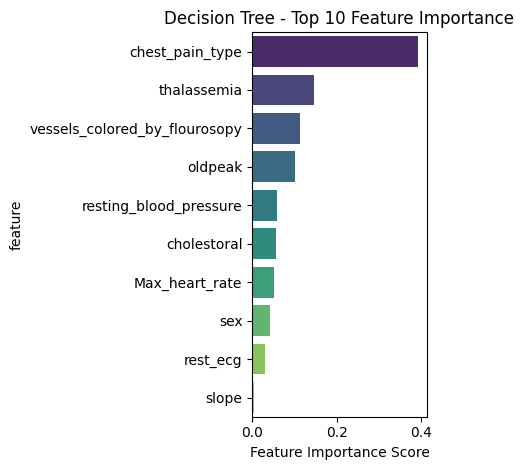

In [49]:
plt.subplot(1, 2, 2)
sns.barplot(data=dt_importance.head(10), x='importance', y='feature', palette='viridis')
plt.title('Decision Tree - Top 10 Feature Importance')
plt.xlabel('Feature Importance Score')

plt.tight_layout()
plt.show()

In [50]:
print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)


MODEL COMPARISON SUMMARY


# Model Comparison summary

In [51]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [lr_accuracy, dt_accuracy],
    'ROC-AUC': [lr_auc, dt_auc]
})

comparison_df


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.803279,0.878788
1,Decision Tree,0.803279,0.810606


In [52]:
# Determine best model
best_model_idx = comparison_df['ROC-AUC'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_auc = comparison_df.loc[best_model_idx, 'ROC-AUC']

print(f"\nBest Model: {best_model} with ROC-AUC: {best_auc:.4f}")



Best Model: Logistic Regression with ROC-AUC: 0.8788


In [53]:
print("\n" + "="*50)
print("KEY INSIGHTS")
print("="*50)



KEY INSIGHTS


In [54]:
print("\nTop 5 Most Important Features (based on both models):")
top_features = set(lr_importance.head(5)['feature']).union(set(dt_importance.head(5)['feature']))
for feature in top_features:
    lr_rank = lr_importance[lr_importance['feature'] == feature].index[0] + 1
    dt_rank = dt_importance[dt_importance['feature'] == feature].index[0] + 1
    print(f"- {feature}: LR Rank {lr_rank}, DT Rank {dt_rank}")



Top 5 Most Important Features (based on both models):
- sex: LR Rank 2, DT Rank 2
- vessels_colored_by_flourosopy: LR Rank 12, DT Rank 12
- oldpeak: LR Rank 10, DT Rank 10
- thalassemia: LR Rank 13, DT Rank 13
- chest_pain_type: LR Rank 3, DT Rank 3
- Max_heart_rate: LR Rank 8, DT Rank 8
- resting_blood_pressure: LR Rank 4, DT Rank 4


In [55]:
print("\nInterpretation of Key Features:")
feature_interpretation = {
    'chest_pain_type': 'Type of chest pain experienced',
    'oldpeak': 'ST depression induced by exercise relative to rest',
    'thalassemia': 'Thalassemia blood disorder',
    'Max_heart_rate': 'Maximum heart rate achieved',
    'vessels_colored_by_flourosopy': 'Number of major vessels colored by fluoroscopy',
    'age': 'Age of the patient',
    'cholestoral': 'Cholesterol level in mg/dl',
    'resting_blood_pressure': 'Resting blood pressure'
}

for feature in list(top_features)[:6]:
    if feature in feature_interpretation:
        print(f"- {feature}: {feature_interpretation[feature]}")



Interpretation of Key Features:
- vessels_colored_by_flourosopy: Number of major vessels colored by fluoroscopy
- oldpeak: ST depression induced by exercise relative to rest
- thalassemia: Thalassemia blood disorder
- chest_pain_type: Type of chest pain experienced
- Max_heart_rate: Maximum heart rate achieved


In [56]:
print("\n" + "="*50)
print("FINAL RECOMMENDATIONS")
print("="*50)
print("1. The model suggests these are key indicators for heart disease risk:")
print("   - Chest pain type and exercise-induced ST depression (oldpeak)")
print("   - Thalassemia status and maximum heart rate achieved")
print("   - Number of major vessels visible in fluoroscopy")
print("   - Age and cholesterol levels")
print("\n2. Medical professionals should pay close attention to these factors during patient assessments.")
print("\n3. Regular monitoring of these parameters can help in early detection of heart disease risk.")


FINAL RECOMMENDATIONS
1. The model suggests these are key indicators for heart disease risk:
   - Chest pain type and exercise-induced ST depression (oldpeak)
   - Thalassemia status and maximum heart rate achieved
   - Number of major vessels visible in fluoroscopy
   - Age and cholesterol levels

2. Medical professionals should pay close attention to these factors during patient assessments.

3. Regular monitoring of these parameters can help in early detection of heart disease risk.
